<a href="https://colab.research.google.com/github/MehrdadJalali-KIT/Statistics-and-Machine-Learning/blob/main/C3_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Time Series Data

The above plot shows a synthetic time series dataset created by combining three components: trend, seasonality, and noise. This dataset spans 200 days and is intended to illustrate key characteristics of time series data.

- **Trend:** A long-term increase in the data is visible from left to right.
- **Seasonality:** The oscillating pattern observed in the data reflects seasonal variations.
- **Noise:** Random fluctuations add variability to the overall pattern.


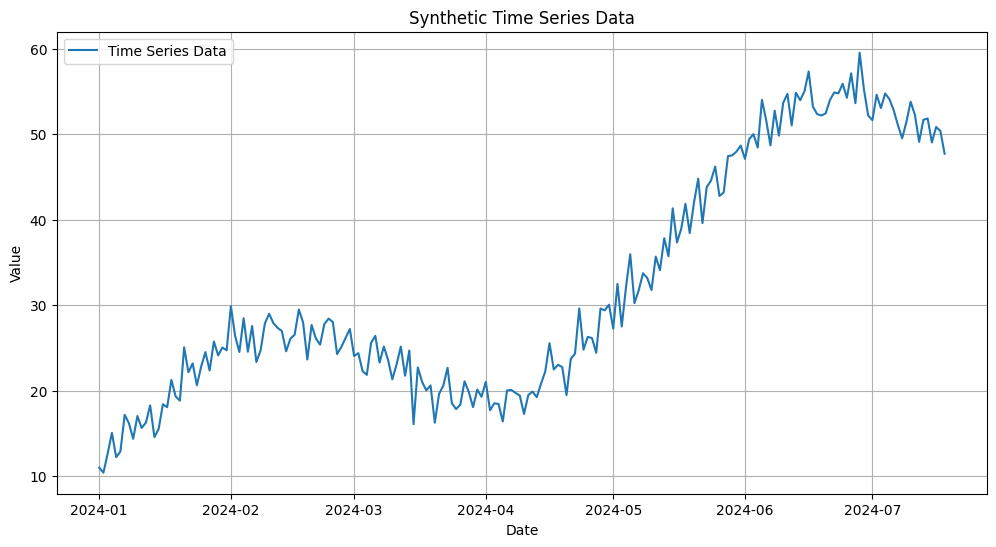

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic time series data
np.random.seed(42)
date_range = pd.date_range(start='2024-01-01', periods=200, freq='D')
trend = np.linspace(10, 50, 200)
seasonality = 10 * np.sin(np.linspace(0, 3*np.pi, 200))
noise = np.random.normal(0, 2, 200)
time_series_data = trend + seasonality + noise

# Create a DataFrame
df = pd.DataFrame({'Date': date_range, 'Value': time_series_data})
df.set_index('Date', inplace=True)

# Plot the synthetic time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], label='Time Series Data')
plt.title('Synthetic Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


### Time Series Decomposition

The above plots display the results of decomposing the synthetic time series into its three main components:

1. **Original Time Series:** This is the complete data as seen in the previous plot.
2. **Trend Component:** This plot shows the underlying long-term trend in the data, which steadily increases over time.
3. **Seasonal Component:** The oscillating pattern that repeats at regular intervals (approximately every 30 days) is captured here.
4. **Residual (Noise) Component:** This plot shows the random noise or irregularities that remain after removing the trend and seasonal components.

By breaking down the time series, we can better understand the data's structure and make more accurate forecasts.


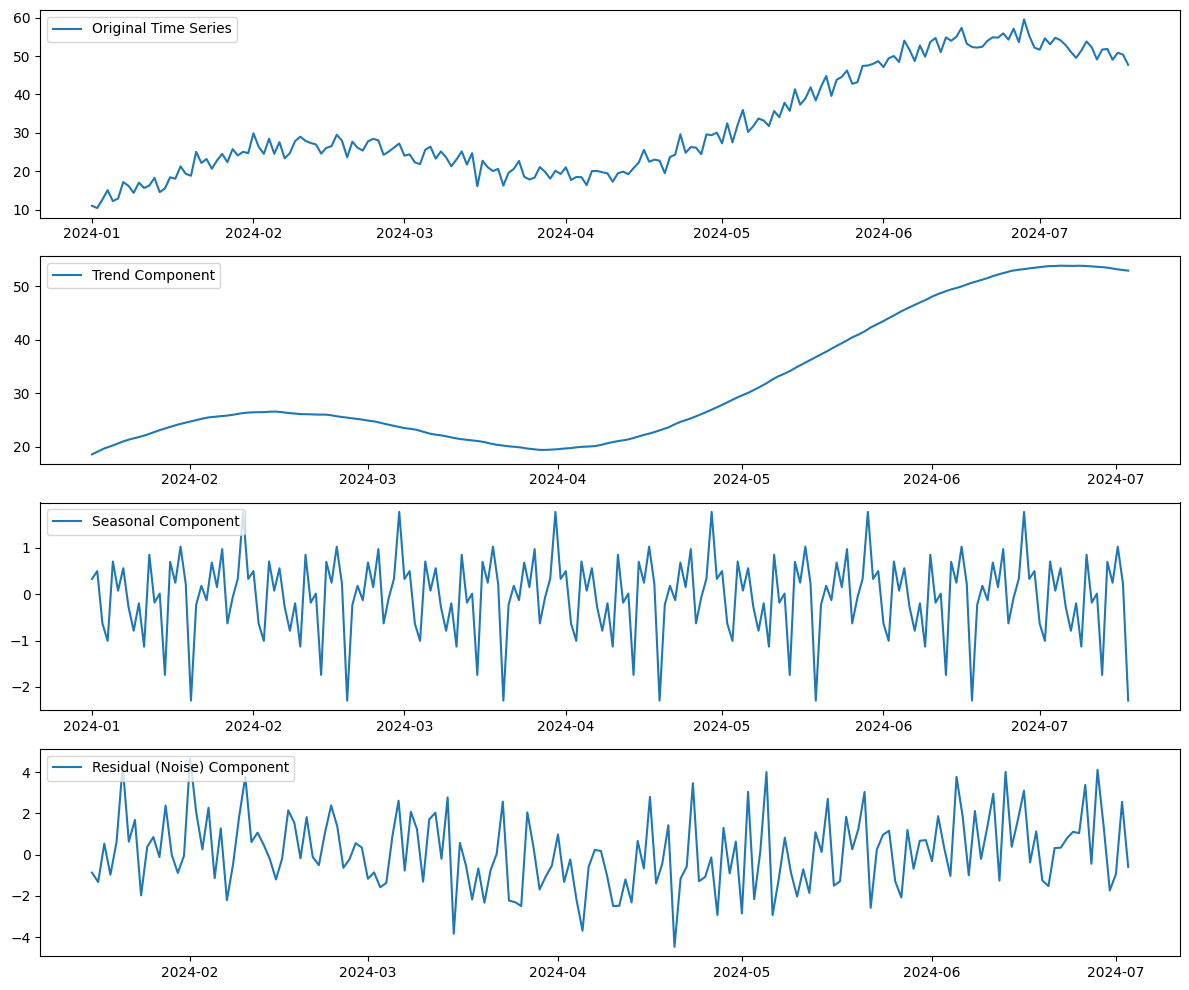

In [ ]:
# Import the decomposition tool from statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomposition = seasonal_decompose(df['Value'], model='additive', period=30)

# Plot the decomposed components
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(df['Value'], label='Original Time Series')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend Component')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual (Noise) Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


### Trend Component

This plot focuses on the trend component, which reveals the overall direction in which the data is moving over time. In this case, the trend shows a consistent upward trajectory, indicating a long-term increase in the time series values.


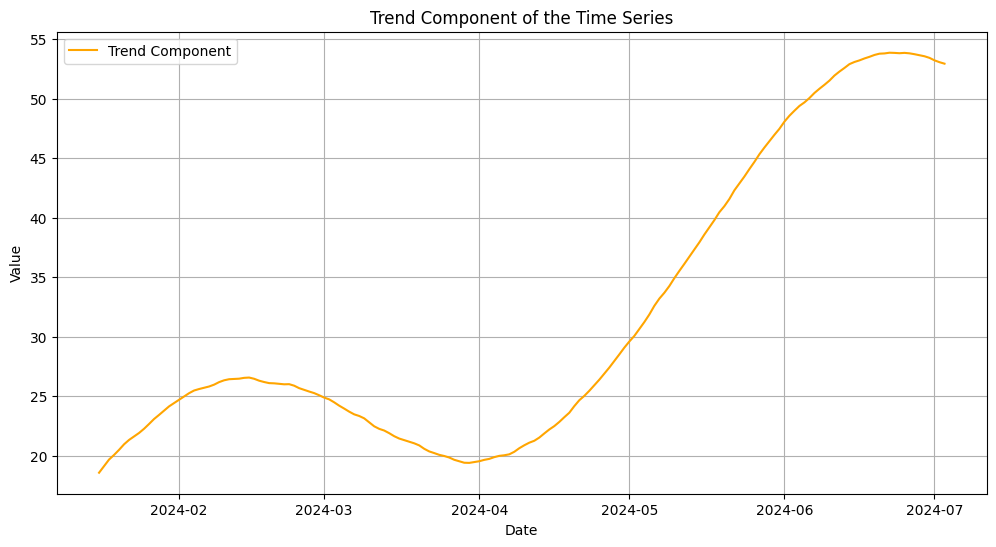

In [ ]:
# Plot only the trend component
plt.figure(figsize=(12, 6))
plt.plot(decomposition.trend, label='Trend Component', color='orange')
plt.title('Trend Component of the Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


### Seasonal Component

The seasonal component isolates the repeating patterns observed at regular intervals. This sinusoidal pattern represents the predictable fluctuations in the data, which occur roughly every 30 days in this synthetic dataset.


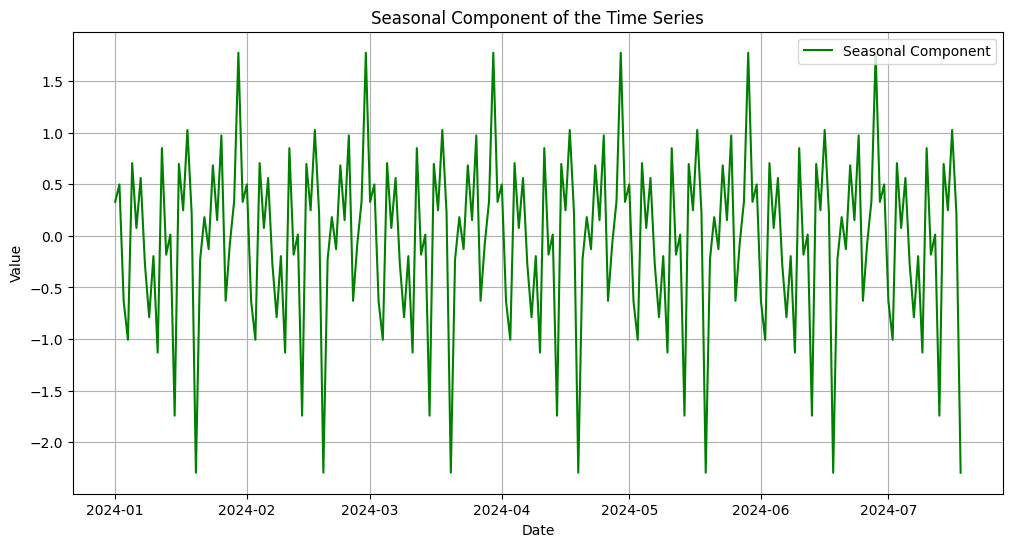

In [ ]:
# Plot only the seasonal component
plt.figure(figsize=(12, 6))
plt.plot(decomposition.seasonal, label='Seasonal Component', color='green')
plt.title('Seasonal Component of the Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


### Residual (Noise) Component

The residual component captures the random noise or irregularities in the data. It represents the part of the time series that cannot be explained by either the trend or seasonal components, and it often reflects unexpected or unpredictable variations.


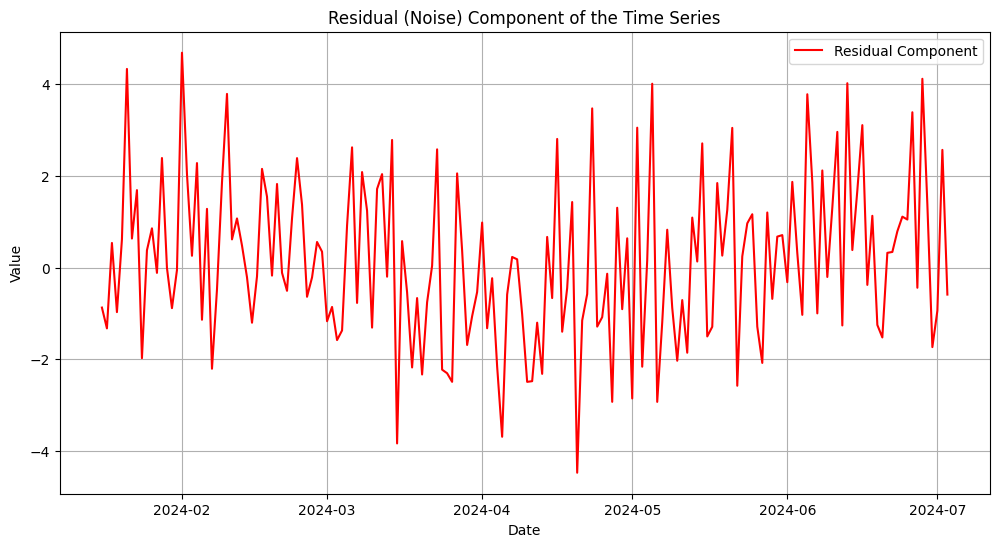

In [ ]:
# Plot only the residual (noise) component
plt.figure(figsize=(12, 6))
plt.plot(decomposition.resid, label='Residual Component', color='red')
plt.title('Residual (Noise) Component of the Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


### Additive vs. Multiplicative Decomposition

The plots above show the results of a multiplicative decomposition of the time series data. In contrast to the additive model, the multiplicative model assumes that the components multiply together to form the observed data.

- **Multiplicative Trend:** Shows the proportional changes in the data over time.
- **Multiplicative Seasonal Component:** Reflects seasonal effects that vary in magnitude with the level of the trend.
- **Multiplicative Residual:** Captures the remaining irregular variations after accounting for multiplicative trend and seasonality.

This method is particularly useful when seasonal fluctuations increase with the level of the time series.


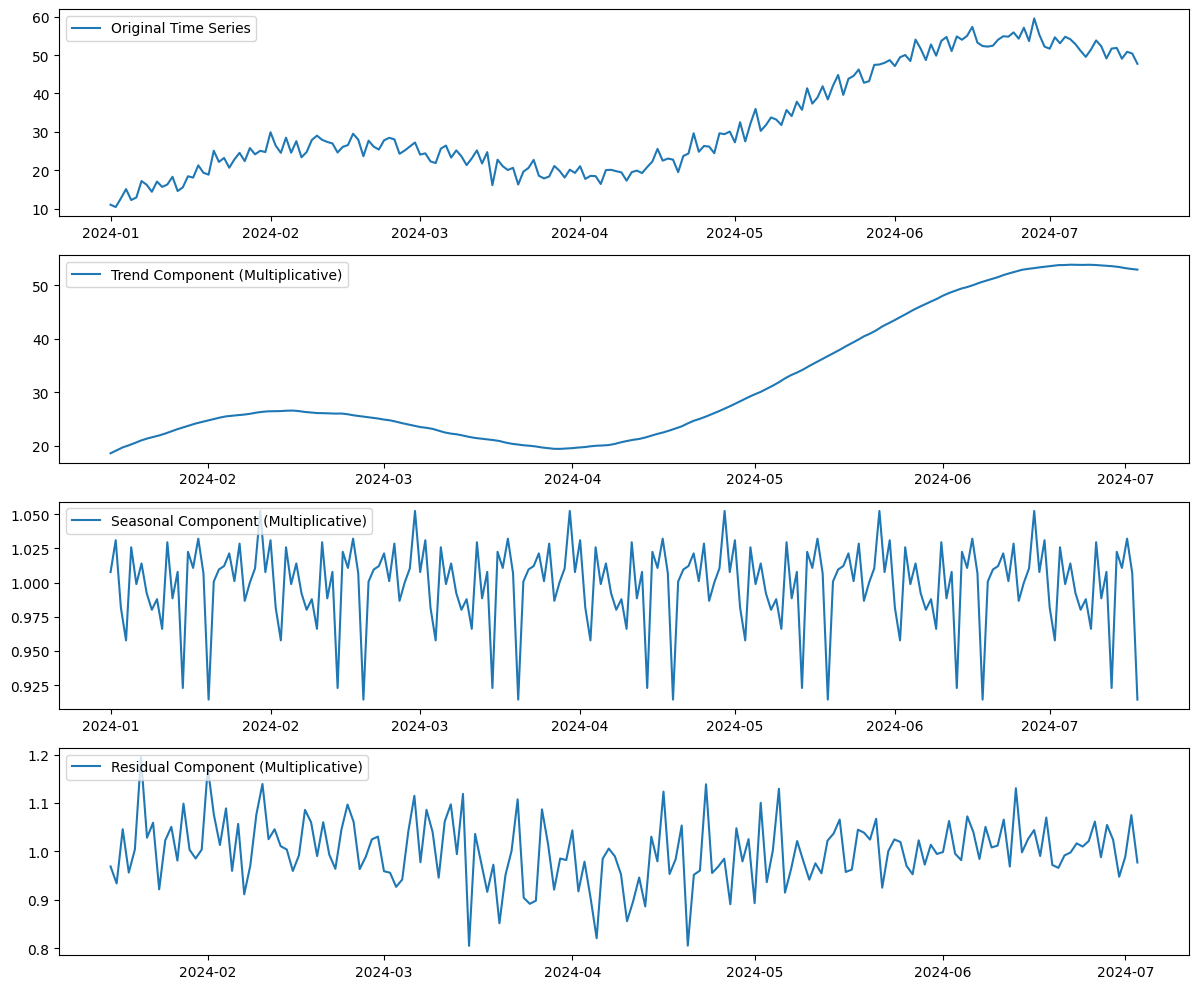

In [ ]:
# Perform multiplicative decomposition
decomposition_multiplicative = seasonal_decompose(df['Value'], model='multiplicative', period=30)

# Plot the decomposed components (Multiplicative)
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(df['Value'], label='Original Time Series')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition_multiplicative.trend, label='Trend Component (Multiplicative)')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition_multiplicative.seasonal, label='Seasonal Component (Multiplicative)')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition_multiplicative.resid, label='Residual Component (Multiplicative)')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


### Monthly International Airline Passengers

The plot bellow shows the monthly number of international airline passengers from January 1949 to December 1960. The data exhibits an overall upward trend, indicating an increase in air travel over time. Additionally, there is a clear seasonal pattern, with peaks in passenger numbers at regular intervals.


[1949.         1949.08333333 1949.16666667 1949.25       1949.33333333
 1949.41666667 1949.5        1949.58333333 1949.66666667 1949.75
 1949.83333333 1949.91666667 1950.         1950.08333333 1950.16666667
 1950.25       1950.33333333 1950.41666667 1950.5        1950.58333333
 1950.66666667 1950.75       1950.83333333 1950.91666667 1951.
 1951.08333333 1951.16666667 1951.25       1951.33333333 1951.41666667
 1951.5        1951.58333333 1951.66666667 1951.75       1951.83333333
 1951.91666667 1952.         1952.08333333 1952.16666667 1952.25
 1952.33333333 1952.41666667 1952.5        1952.58333333 1952.66666667
 1952.75       1952.83333333 1952.91666667 1953.         1953.08333333
 1953.16666667 1953.25       1953.33333333 1953.41666667 1953.5
 1953.58333333 1953.66666667 1953.75       1953.83333333 1953.91666667
 1954.         1954.08333333 1954.16666667 1954.25       1954.33333333
 1954.41666667 1954.5        1954.58333333 1954.66666667 1954.75
 1954.83333333 1954.91666667 1955.     

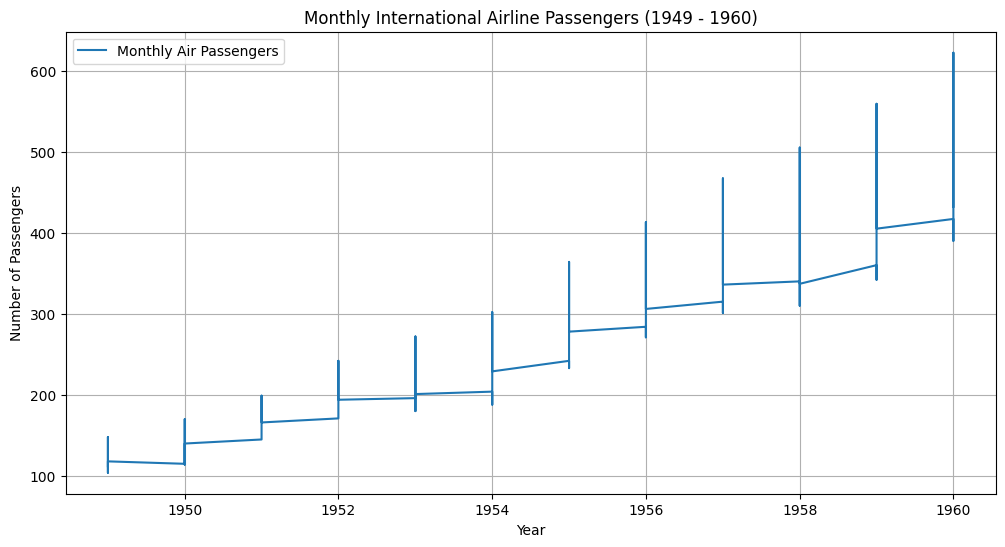

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the AirPassengers dataset from statsmodels
from statsmodels.datasets import get_rdataset
data = get_rdataset('AirPassengers').data

# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(data)
df.columns = ['YearMonth', 'Passengers']

# Inspect the 'YearMonth' column for unusual values
print(df['YearMonth'].unique())

# If necessary, clean the 'YearMonth' column to remove or correct any erroneous values
# For example, if '8333333333' is an error, you might replace it with the correct year

# Convert the 'YearMonth' to a proper datetime format
df['YearMonth'] = pd.to_datetime(df['YearMonth'], format='%Y')
df.set_index('YearMonth', inplace=True)

# Plot the original time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Monthly Air Passengers')
plt.title('Monthly International Airline Passengers (1949 - 1960)')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()



### Additive Decomposition of Airline Passenger Data

The decomposition of the airline passenger data into trend, seasonal, and residual components provides the following insights:

1. **Original Time Series:** The raw data shows a general upward trend along with repeating seasonal peaks.
2. **Trend Component:** The trend component reveals the long-term increase in the number of passengers over the years.
3. **Seasonal Component:** The seasonal pattern is very regular, indicating higher passenger numbers at certain times of the year, likely corresponding to holidays or vacation periods.
4. **Residual Component:** The residuals capture the random fluctuations and irregularities not explained by the trend or seasonal components.

This decomposition helps us understand the underlying structure of the time series and is a critical step for accurate forecasting.


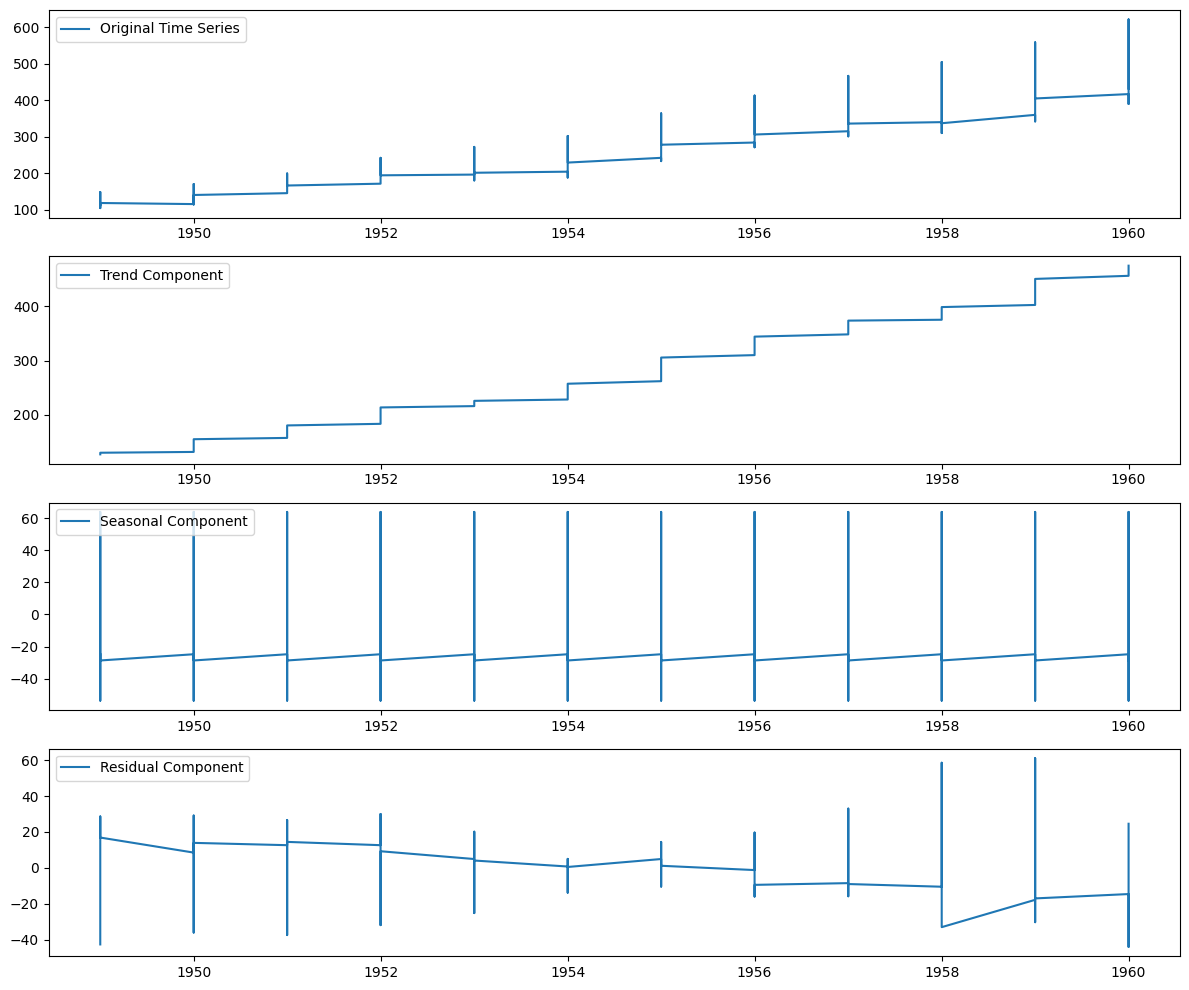

In [ ]:
# Perform additive decomposition
decomposition = seasonal_decompose(df['Passengers'], model='additive', period=12)

# Plot the decomposed components
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(df['Passengers'], label='Original Time Series')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend Component')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


### Multiplicative Decomposition of Airline Passenger Data

The multiplicative decomposition of the airline passenger data provides an alternative view:

1. **Original Time Series:** Same as the additive decomposition, but here the components are considered multiplicative.
2. **Trend Component (Multiplicative):** The trend shows the overall growth, similar to the additive model, but here it reflects proportional changes relative to the level of the series.
3. **Seasonal Component (Multiplicative):** The seasonal component now shows proportional seasonal effects, indicating that the magnitude of seasonal fluctuations increases as the number of passengers grows.
4. **Residual Component (Multiplicative):** The residuals capture the remaining irregularities, but these are relative to the overall level of the series.

Multiplicative decomposition is particularly useful when the seasonal variations increase in amplitude with the level of the time series.


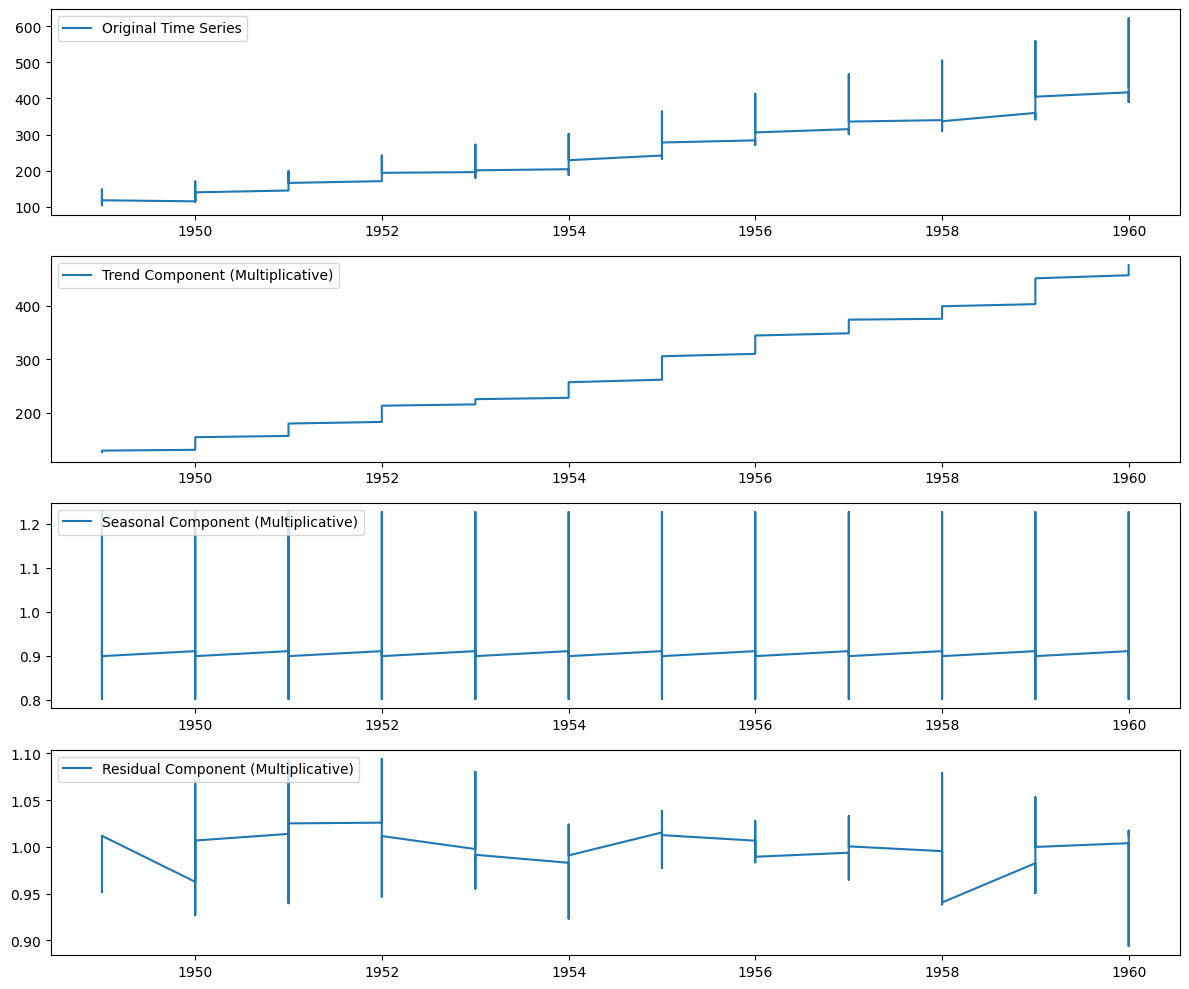

In [ ]:
# Perform multiplicative decomposition
decomposition_multiplicative = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)

# Plot the decomposed components (Multiplicative)
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(df['Passengers'], label='Original Time Series')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition_multiplicative.trend, label='Trend Component (Multiplicative)')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition_multiplicative.seasonal, label='Seasonal Component (Multiplicative)')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition_multiplicative.resid, label='Residual Component (Multiplicative)')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


**Classical Decomposition**
Method: Splits the series into trend, seasonal, and residual components using moving averages for trend estimation and subtraction for seasonality extraction.

Steps:

*Estimate Trend Component:*
Using moving averages to smooth the series and highlight the long-term trend in temperature data.

**Extract Seasonal Component:**
Subtract the trend component from the original series to isolate the seasonal effects (e.g., regular temperature fluctuations throughout the year).

**Compute Residuals:**
Subtract both the trend and seasonality from the original series. The remaining component after removing both trend and seasonality is the residual, capturing random or irregular variations.

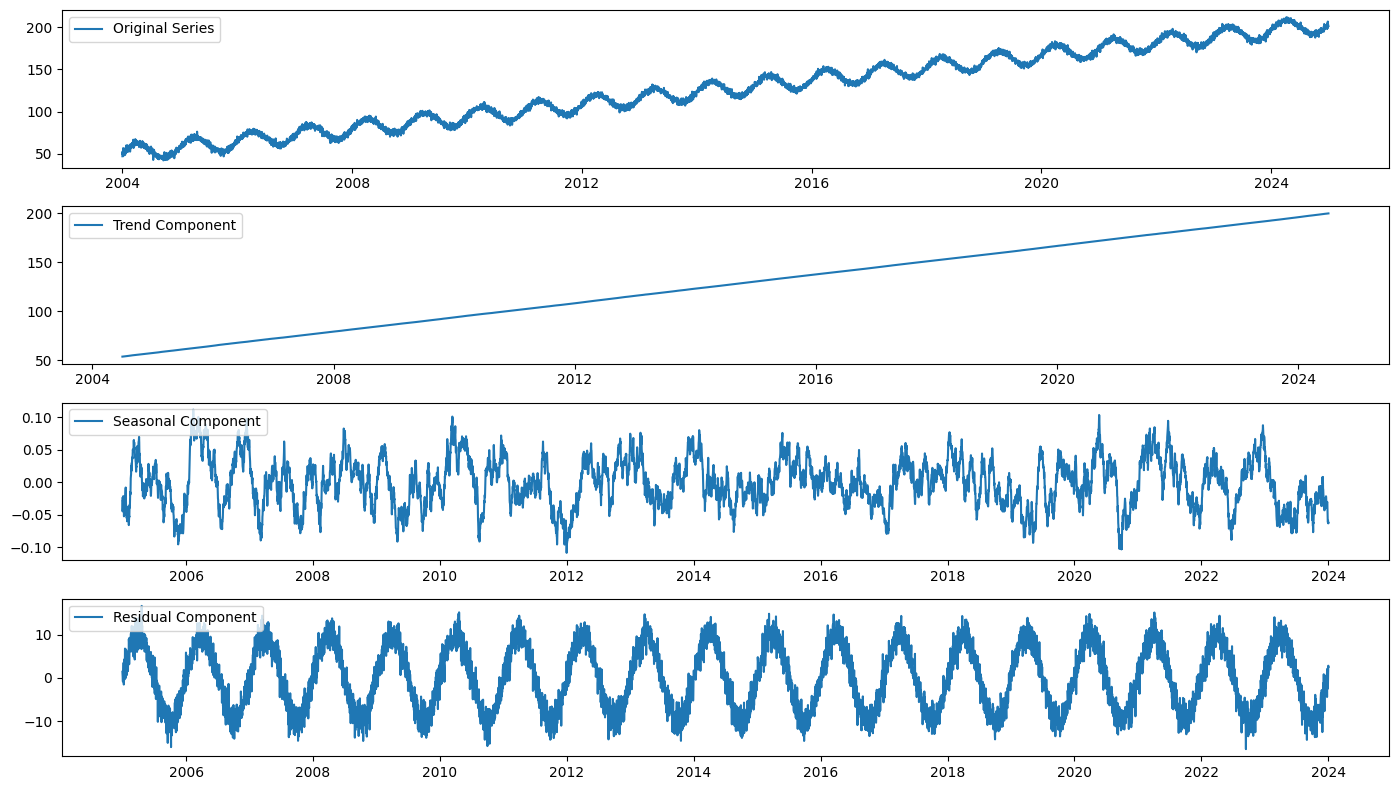

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic daily temperature data
date_range = pd.date_range(start='2004-01-01', end='2024-12-31', freq='D')
trend = 0.02 * (pd.Series(range(len(date_range)), index=date_range))
seasonality = 10 * np.sin(2 * np.pi * pd.Series(range(len(date_range)), index=date_range) / 365.25)
noise = np.random.normal(0, 2, len(date_range))
temperature_data = 50 + trend + seasonality + noise

# Create a DataFrame
df = pd.DataFrame({'Temperature': temperature_data}, index=date_range)

# Step 1: Estimate the Trend Component (Using a 365-day moving average)
df['Trend'] = df['Temperature'].rolling(window=365, center=True).mean()

# Step 2: Extract the Seasonal Component
df['Seasonal'] = df['Temperature'] - df['Trend']

# Step 3: Compute the Residuals
df['Residual'] = df['Seasonal'] - df['Seasonal'].rolling(window=365, center=True).mean()

# Plot the Decomposed Components
plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(df['Temperature'], label='Original Series')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(df['Trend'], label='Trend Component')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(df['Seasonal'].rolling(window=365, center=True).mean(), label='Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(df['Residual'], label='Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


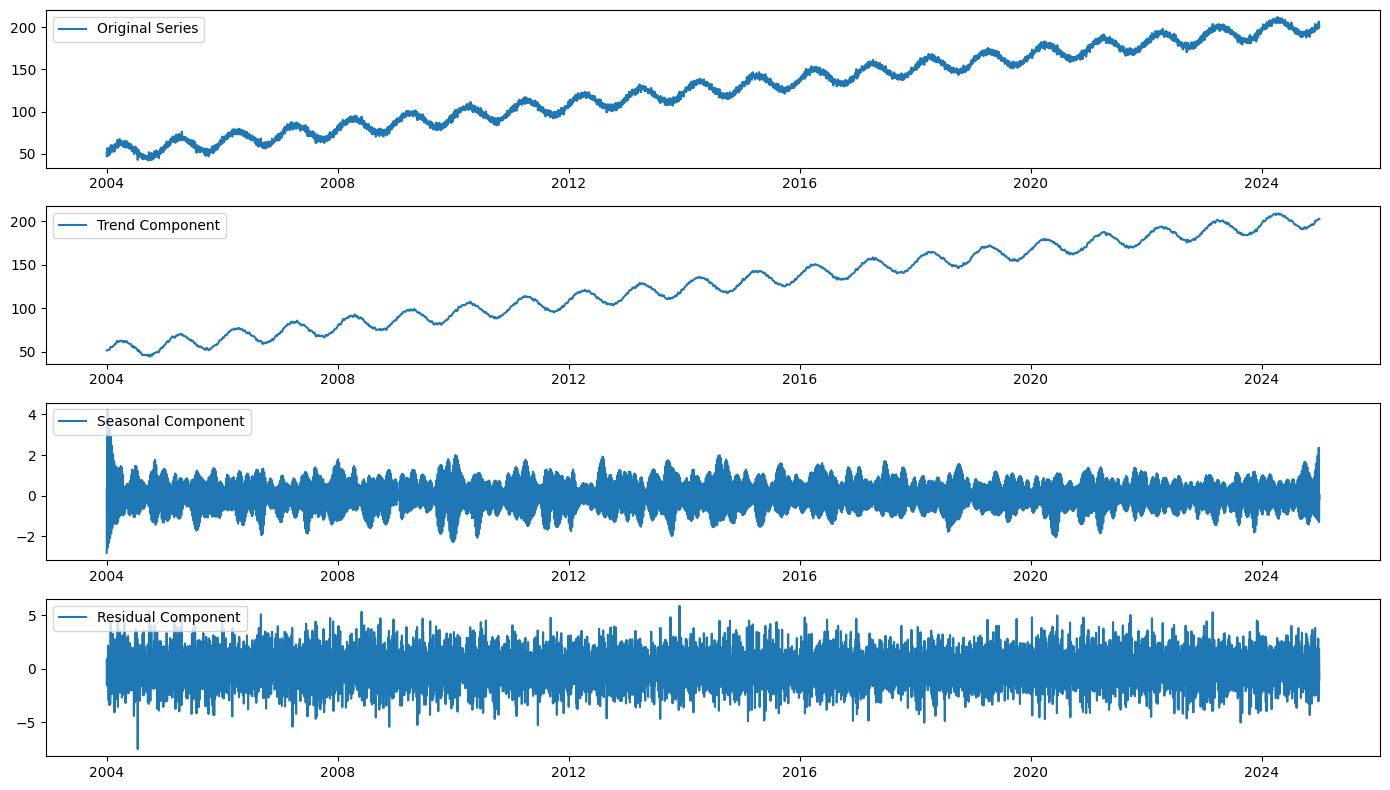

In [ ]:
from statsmodels.tsa.seasonal import STL

# Apply STL Decomposition
stl = STL(df['Temperature'], seasonal=13)
result = stl.fit()

# Plot the Decomposed Components
plt.figure(figsize=(14, 8))

plt.subplot(411)
plt.plot(df['Temperature'], label='Original Series')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(result.trend, label='Trend Component')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(result.resid, label='Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


**STL Decomposition (Seasonal-Trend Decomposition using LOESS)**
**Method:** Uses locally weighted regression to decompose time series into trend, seasonality, and residual components. This method is more flexible and can handle complex patterns in data, such as non-linear trends and varying seasonal effects.

**Advantages:**

Handles non-linear trends and varying seasonal patterns.
More robust in the presence of outliers and complex seasonality.

### Moving Averages

- **Simple Moving Average (SMA):**  
  The 10-day and 30-day SMAs are plotted above, showing how SMAs smooth out the data by averaging values over a fixed window. The 30-day SMA is smoother because it considers a broader range of values, making it less sensitive to short-term fluctuations compared to the 10-day SMA.

- **Weighted Moving Average (WMA):**  
  The 10-day WMA assigns more weight to recent values, making it more responsive to recent changes in the data. This method is useful when you want the trend line to react more quickly to changes in the data.


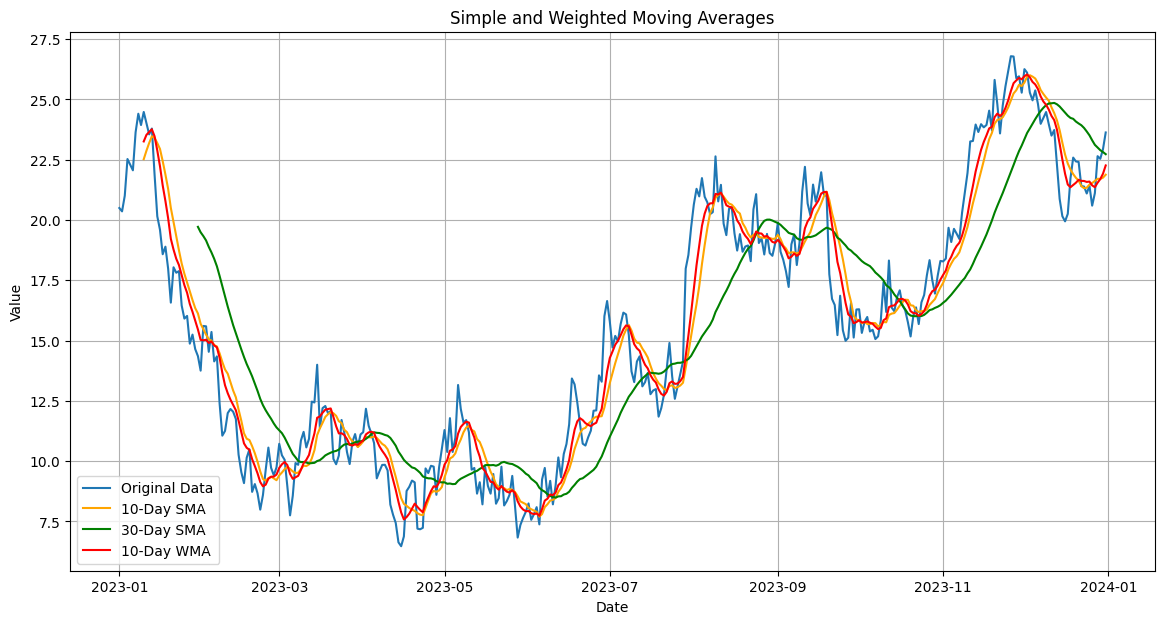

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
date_range = pd.date_range(start='2023-01-01', periods=365, freq='D')
data = np.cumsum(np.random.randn(365)) + 20  # Random walk with a drift
df = pd.DataFrame({'Date': date_range, 'Value': data})
df.set_index('Date', inplace=True)

# Calculate Simple Moving Average (SMA)
df['SMA_10'] = df['Value'].rolling(window=10).mean()
df['SMA_30'] = df['Value'].rolling(window=30).mean()

# Calculate Weighted Moving Average (WMA)
weights = np.arange(1, 11)
df['WMA_10'] = df['Value'].rolling(window=10).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(df['Value'], label='Original Data')
plt.plot(df['SMA_10'], label='10-Day SMA', color='orange')
plt.plot(df['SMA_30'], label='30-Day SMA', color='green')
plt.plot(df['WMA_10'], label='10-Day WMA', color='red')
plt.title('Simple and Weighted Moving Averages')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


### Exponential Smoothing

- **Single Exponential Smoothing (SES):**  
  SES applies exponential decay to past observations, with the most recent observations receiving the highest weight. It’s effective for data without a trend or seasonality.

- **Double Exponential Smoothing (DES):**  
  DES is used when the data has a trend. The plot shows that DES captures both the level and trend in the data, making it more responsive to changes than SES.

- **Triple Exponential Smoothing (TES):**  
  TES, also known as the Holt-Winters method, is used for data with both trend and seasonality. The plot shows how TES can accurately capture the seasonal patterns along with the trend, providing a more nuanced forecast.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


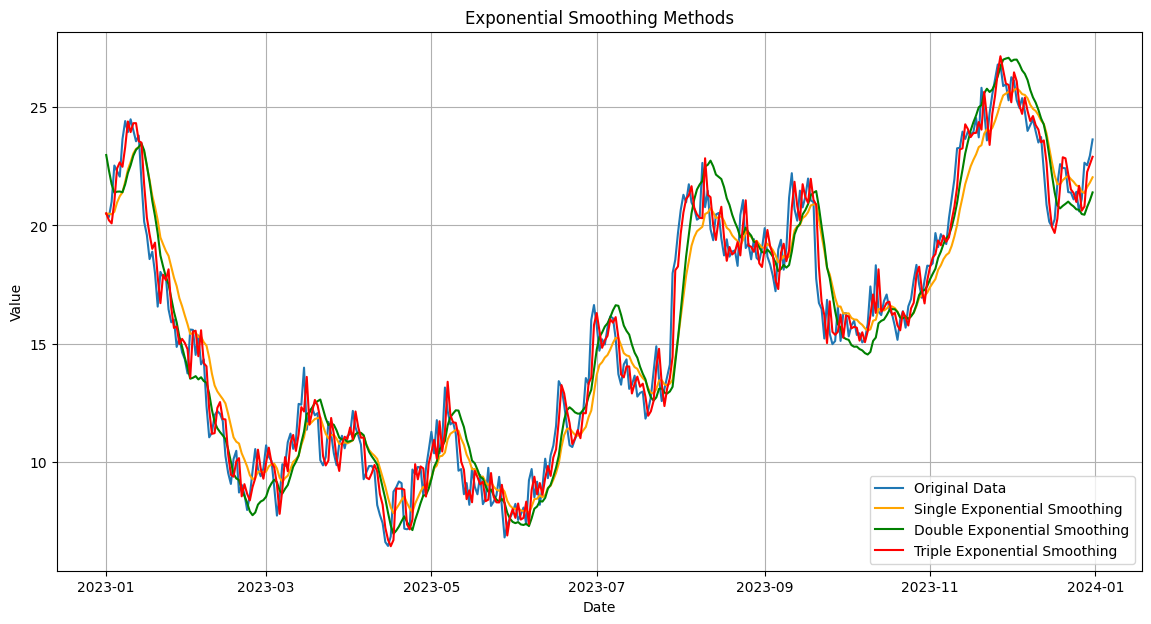

In [23]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Single Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(df['Value']).fit(smoothing_level=0.2, optimized=False)
df['SES'] = ses_model.fittedvalues

# Double Exponential Smoothing (DES)
des_model = ExponentialSmoothing(df['Value'], trend='add').fit(smoothing_level=0.2, smoothing_trend=0.1)
df['DES'] = des_model.fittedvalues

# Triple Exponential Smoothing (TES)
tes_model = ExponentialSmoothing(df['Value'], trend='add', seasonal='add', seasonal_periods=12).fit()
df['TES'] = tes_model.fittedvalues

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(df['Value'], label='Original Data')
plt.plot(df['SES'], label='Single Exponential Smoothing', color='orange')
plt.plot(df['DES'], label='Double Exponential Smoothing', color='green')
plt.plot(df['TES'], label='Triple Exponential Smoothing', color='red')
plt.title('Exponential Smoothing Methods')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


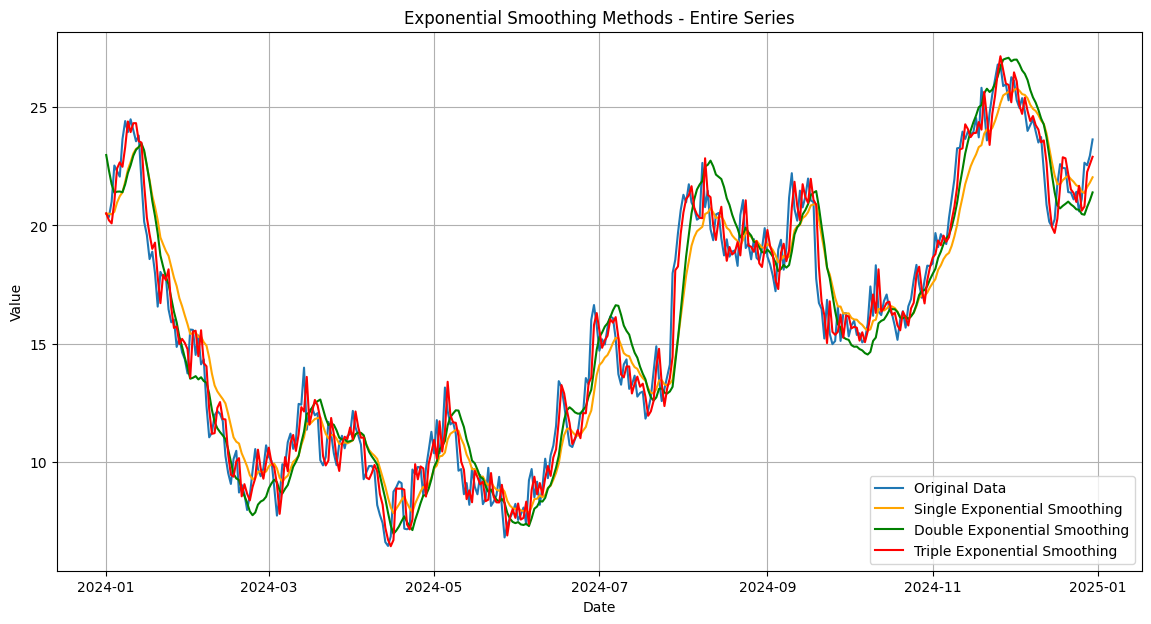

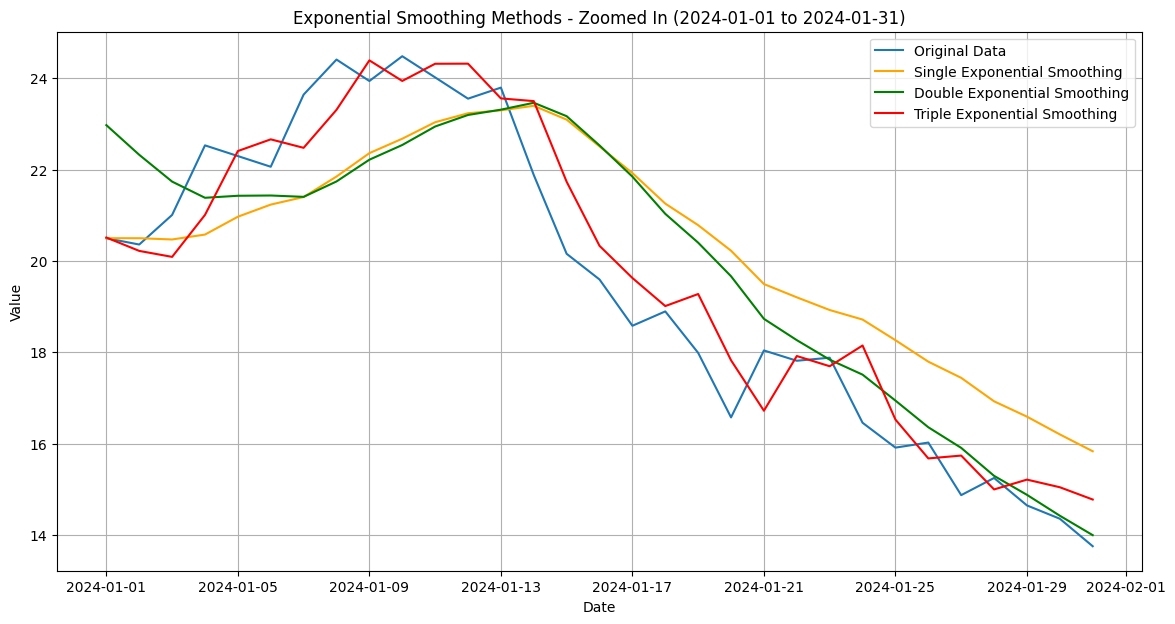

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Generate synthetic data
np.random.seed(42)
date_range = pd.date_range(start='2024-01-01', periods=365, freq='D')
data = np.cumsum(np.random.randn(365)) + 20  # Random walk with a drift
df = pd.DataFrame({'Date': date_range, 'Value': data})
df.set_index('Date', inplace=True)

# Single Exponential Smoothing (SES)
ses_model = SimpleExpSmoothing(df['Value']).fit(smoothing_level=0.2, optimized=False)
df['SES'] = ses_model.fittedvalues

# Double Exponential Smoothing (DES)
des_model = ExponentialSmoothing(df['Value'], trend='add').fit(smoothing_level=0.2, smoothing_trend=0.1)
df['DES'] = des_model.fittedvalues

# Triple Exponential Smoothing (TES)
tes_model = ExponentialSmoothing(df['Value'], trend='add', seasonal='add', seasonal_periods=12).fit()
df['TES'] = tes_model.fittedvalues

# Plot the entire series
plt.figure(figsize=(14, 7))
plt.plot(df['Value'], label='Original Data')
plt.plot(df['SES'], label='Single Exponential Smoothing', color='orange')
plt.plot(df['DES'], label='Double Exponential Smoothing', color='green')
plt.plot(df['TES'], label='Triple Exponential Smoothing', color='red')
plt.title('Exponential Smoothing Methods - Entire Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Zoom in on the month starting from 2024-01-01
start_date = '2024-01-01'
end_date = '2024-01-31'
plt.figure(figsize=(14, 7))
plt.plot(df.loc[start_date:end_date, 'Value'], label='Original Data')
plt.plot(df.loc[start_date:end_date, 'SES'], label='Single Exponential Smoothing', color='orange')
plt.plot(df.loc[start_date:end_date, 'DES'], label='Double Exponential Smoothing', color='green')
plt.plot(df.loc[start_date:end_date, 'TES'], label='Triple Exponential Smoothing', color='red')
plt.title(f'Exponential Smoothing Methods - Zoomed In ({start_date} to {end_date})')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


### Autoregressive (AR) Models

#### Understanding the Autoregressive Model

An Autoregressive (AR) model is used to describe time series data where the current value is dependent on its previous values. The AR model of order \( p \), denoted as AR(\( p \)), uses the last \( p \) observations to predict the current observation. This model is powerful for capturing the temporal dependencies in time series data.

**Applications:**
- **Finance:** Predicting stock prices based on historical prices.
- **Economics:** Modeling macroeconomic indicators like GDP and unemployment rates.
- **Weather Forecasting:** Predicting future temperatures based on past data.

#### Practical Implementation Using Python

In the above example:
- We generate synthetic AR(2) data where the current value is dependent on the previous two values.
- We then fit an AR(2) model to this data using the `AutoReg` class from the `statsmodels` library.
- Finally, we use the model to predict future values and plot both the original data and the predictions.

**Key Points:**
- The model summary provides insights into the coefficients of the AR model, which quantify the relationship between the current value and its past values.
- The predictions show how the AR model can forecast future data points based on past observations.


                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  200
Model:                     AutoReg(2)   Log Likelihood                -278.106
Method:               Conditional MLE   S.D. of innovations              0.986
Date:                Sat, 31 Aug 2024   AIC                            564.213
Time:                        08:57:12   BIC                            577.366
Sample:                             2   HQIC                           569.537
                                  200                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0835      0.070      1.185      0.236      -0.055       0.222
Value.L1       1.4974      0.047     32.114      0.000       1.406       1.589
Value.L2      -0.7553      0.047    -16.183      0.0

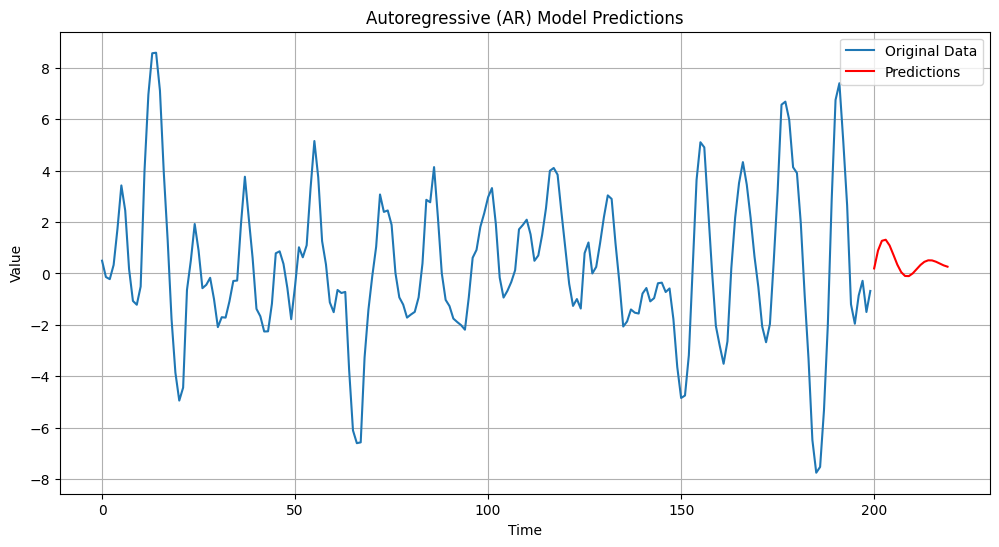

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Generate synthetic AR(2) data
np.random.seed(42)
n = 200
ar_params = [1.5, -0.75]  # AR(2) coefficients
ar = np.r_[1, -np.array(ar_params)]  # Add 1 for the lag 0 coefficient
ma = np.r_[1]  # No MA part
data = np.random.normal(size=n)
for i in range(2, n):
    data[i] = ar_params[0] * data[i-1] + ar_params[1] * data[i-2] + np.random.normal()

df = pd.DataFrame({'Value': data})

# Fit the AR model using statsmodels
model = AutoReg(df['Value'], lags=2).fit()
print(model.summary())

# Extend the index to include the future period for prediction
future_index = np.arange(len(df), len(df) + 20)
future_dates = pd.Series(future_index, index=future_index)
df_future = pd.concat([df, pd.DataFrame(index=future_dates)])

# Make predictions
df_future['Prediction'] = model.predict(start=len(df), end=len(df) + 19)

# Plot the original data and the predictions
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label='Original Data')
plt.plot(df_future['Prediction'], label='Predictions', color='red')
plt.title('Autoregressive (AR) Model Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


### Moving Average (MA) Models

#### Explanation of the MA Model

A Moving Average (MA) model is used to model time series data where the current value is influenced by past forecast errors. An MA(\( q \)) model uses the last \( q \) forecast errors to predict the current observation, making it a powerful tool for modeling data that is driven by random shocks or unexpected events.

**Applications:**
- **Finance:** Modeling returns where current prices are influenced by past market surprises.
- **Economics:** Forecasting where sudden economic shocks affect future indicators.
- **Signal Processing:** Filtering noise from data based on past error terms.

#### Practical Implementation Using Python

In the above example:
- We generate synthetic MA(2) data where the current value is influenced by the previous two forecast errors.
- We fit an MA(2) model to this data using the ARIMA class in the `statsmodels` library, with AR and I components set to 0.
- Finally, we use the model to predict future values and plot both the original data and the predictions.

**Key Points:**
- The MA model captures the effects of past errors on the current value, making it different from AR models which rely on past observations.
- The predictions show how the MA model can forecast future values based on the patterns in past errors.


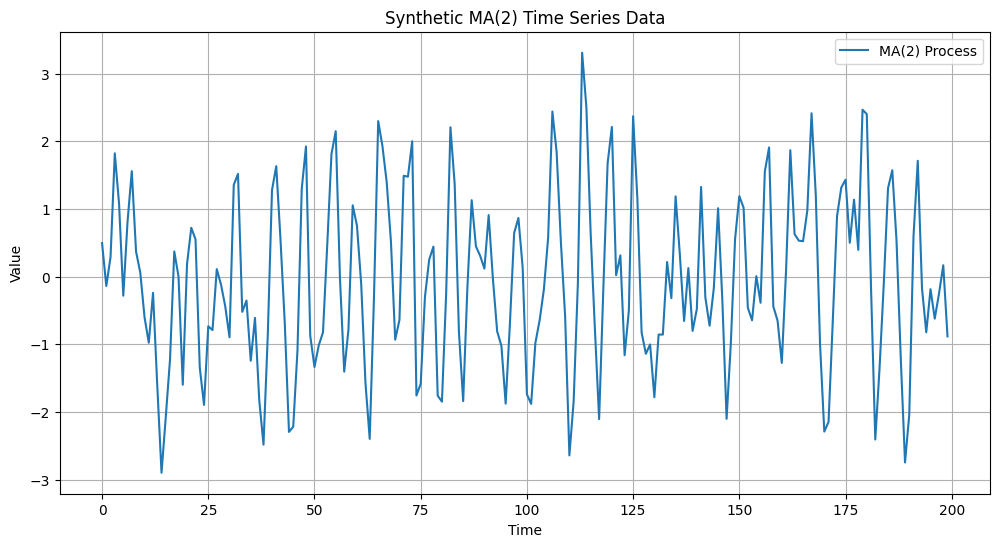

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  200
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -281.205
Date:                Sat, 31 Aug 2024   AIC                            570.409
Time:                        09:02:27   BIC                            583.602
Sample:                             0   HQIC                           575.748
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0608      0.144     -0.422      0.673      -0.343       0.221
ma.L1          0.8299      0.082     10.157      0.000       0.670       0.990
ma.L2          0.2057      0.080      2.557      0.0

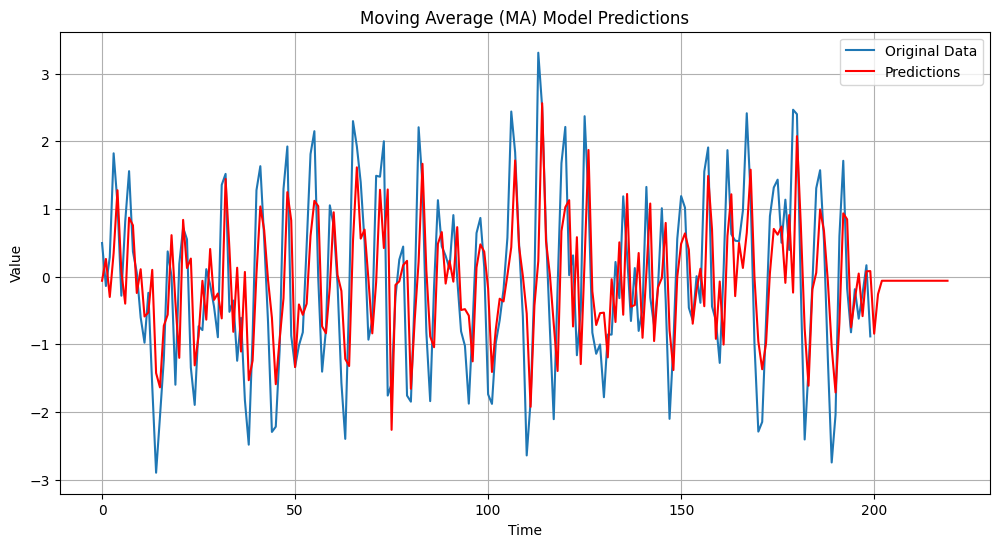

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate synthetic MA(2) data
np.random.seed(42)
n = 200
ma_params = [0.8, -0.5]  # MA(2) coefficients
data = np.random.normal(size=n)
for i in range(2, n):
    data[i] += ma_params[0] * data[i-1] + ma_params[1] * data[i-2]

df = pd.DataFrame({'Value': data})

# Plot the synthetic MA(2) data
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label='MA(2) Process')
plt.title('Synthetic MA(2) Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Fit the MA model using statsmodels (ARIMA with AR=0, I=0, MA=2)
model = ARIMA(df['Value'], order=(0, 0, 2)).fit()
print(model.summary())

# Extend the index to include the future period for prediction
future_index = np.arange(len(df), len(df) + 20)
future_dates = pd.Series(future_index, index=future_index)
df_future = pd.concat([df, pd.DataFrame(index=future_dates)])

# Make predictions
df_future['Prediction'] = model.predict(start=0, end=len(df) + 19)

# Plot the original data and the predictions
plt.figure(figsize=(12, 6))
plt.plot(df_future.index[:len(df)], df['Value'], label='Original Data')
plt.plot(df_future.index, df_future['Prediction'], label='Predictions', color='red')
plt.title('Moving Average (MA) Model Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


### Autoregressive Integrated Moving Average (ARIMA) Models

#### Concepts and Building ARIMA Models

The ARIMA model combines Autoregressive (AR) and Moving Average (MA) components along with differencing (I) to model non-stationary time series data. ARIMA is represented as ARIMA(\( p, d, q \)), where:
- \( p \): Number of lag observations in the model (AR part).
- \( d \): Degree of differencing applied to make the series stationary (I part).
- \( q \): Number of lagged forecast errors in the prediction (MA part).

**Applications:**
- **Finance:** Predicting stock prices or exchange rates.
- **Economics:** Modeling GDP or inflation rates.
- **Sales Forecasting:** Predicting future sales trends.

#### Practical Implementation Using Python

In the example:
- We generate a synthetic non-stationary time series with an upward trend.
- We fit an ARIMA(1,1,1) model to the data, where \( p=1 \), \( d=1 \), and \( q=1 \).
- Finally, we use the model to predict future values and plot the original data and predictions.

**Key Points:**
- The ARIMA model is effective for forecasting non-stationary time series data by incorporating differencing to achieve stationarity.
- The predictions show how the model accounts for the trend and past errors to forecast future values.


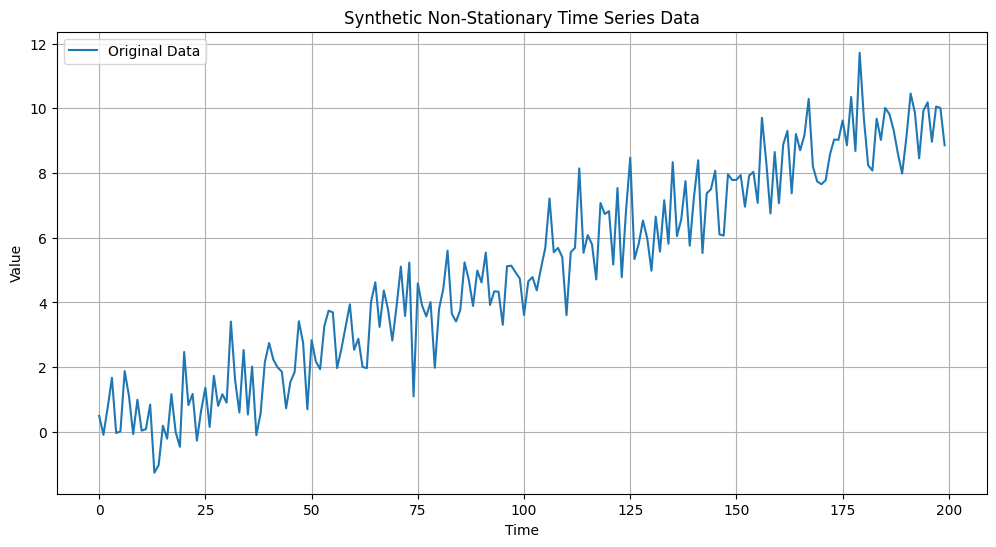

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  200
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -285.133
Date:                Sat, 31 Aug 2024   AIC                            576.266
Time:                        09:10:45   BIC                            586.145
Sample:                             0   HQIC                           580.264
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0886      0.097     -0.913      0.361      -0.279       0.102
ma.L1         -0.7864      0.055    -14.206      0.000      -0.895      -0.678
sigma2         1.0225      0.103      9.890      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


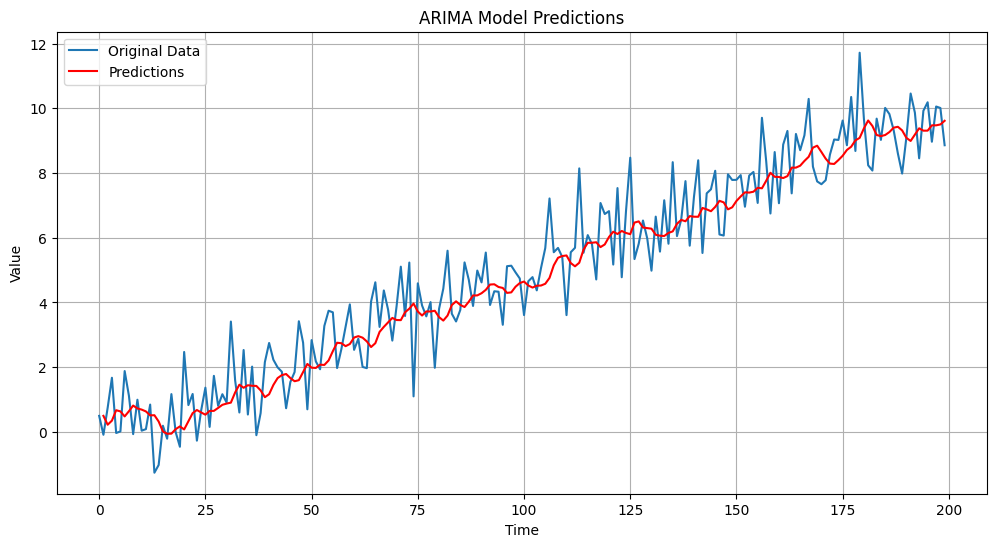

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Generate synthetic non-stationary time series data
np.random.seed(42)
n = 200
trend = np.linspace(0, 10, n)
data = trend + np.random.normal(size=n)

# Convert to a DataFrame
df = pd.DataFrame({'Value': data})

# Plot the synthetic non-stationary data
plt.figure(figsize=(12, 6))
plt.plot(df['Value'], label='Original Data')
plt.title('Synthetic Non-Stationary Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Fit an ARIMA model (Example: ARIMA(1,1,1))
model = ARIMA(df['Value'], order=(1, 1, 1)).fit()
print(model.summary())

# Make predictions
df['Prediction'] = model.predict(start=1, end=len(df) + 20, typ='levels')

# Plot the original data and the predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], label='Original Data')
plt.plot(df.index, df['Prediction'], label='Predictions', color='red')
plt.title('ARIMA Model Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
